<a href="https://colab.research.google.com/github/princesapkota/classification_binary_highanxiety/blob/main/goated_classificationtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df=pd.read_csv("/content/anxiety_attack_dataset.csv")

In [ ]:
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
df = df.drop(columns=['Severity of Anxiety Attack (1-10)'])

In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'High_Anxiety'],
      dtype='object')


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),High_Anxiety
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,40.96675,0.554917,2.530750,6.482650,5.030892,246.696083,9.492833,0.298583,0.401750,5.462250,119.398500,25.462333,2.987417,0.299500,0.199583,4.518417,0.245500,5.497333,0.501083
std,13.47328,0.570098,1.725196,2.014885,2.889000,144.487071,5.769364,0.457656,0.490272,2.897201,34.806711,8.090686,1.414482,0.458058,0.399704,2.866010,0.430401,2.867579,0.500020
min,18.00000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,29.00000,0.000000,1.000000,4.800000,2.500000,122.000000,5.000000,0.000000,0.000000,3.000000,89.000000,18.000000,2.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000
50%,41.00000,1.000000,3.000000,6.500000,5.000000,244.000000,9.000000,0.000000,0.000000,5.000000,119.000000,25.000000,3.000000,0.000000,0.000000,5.000000,0.000000,5.000000,1.000000
75%,53.00000,1.000000,4.000000,8.200000,7.525000,371.000000,15.000000,1.000000,1.000000,8.000000,149.000000,32.000000,4.000000,1.000000,0.000000,7.000000,0.000000,8.000000,1.000000
max,64.00000,2.000000,5.000000,10.000000,10.000000,499.000000,19.000000,1.000000,1.000000,10.000000,179.000000,39.000000,5.000000,1.000000,1.000000,9.000000,1.000000,10.000000,1.000000


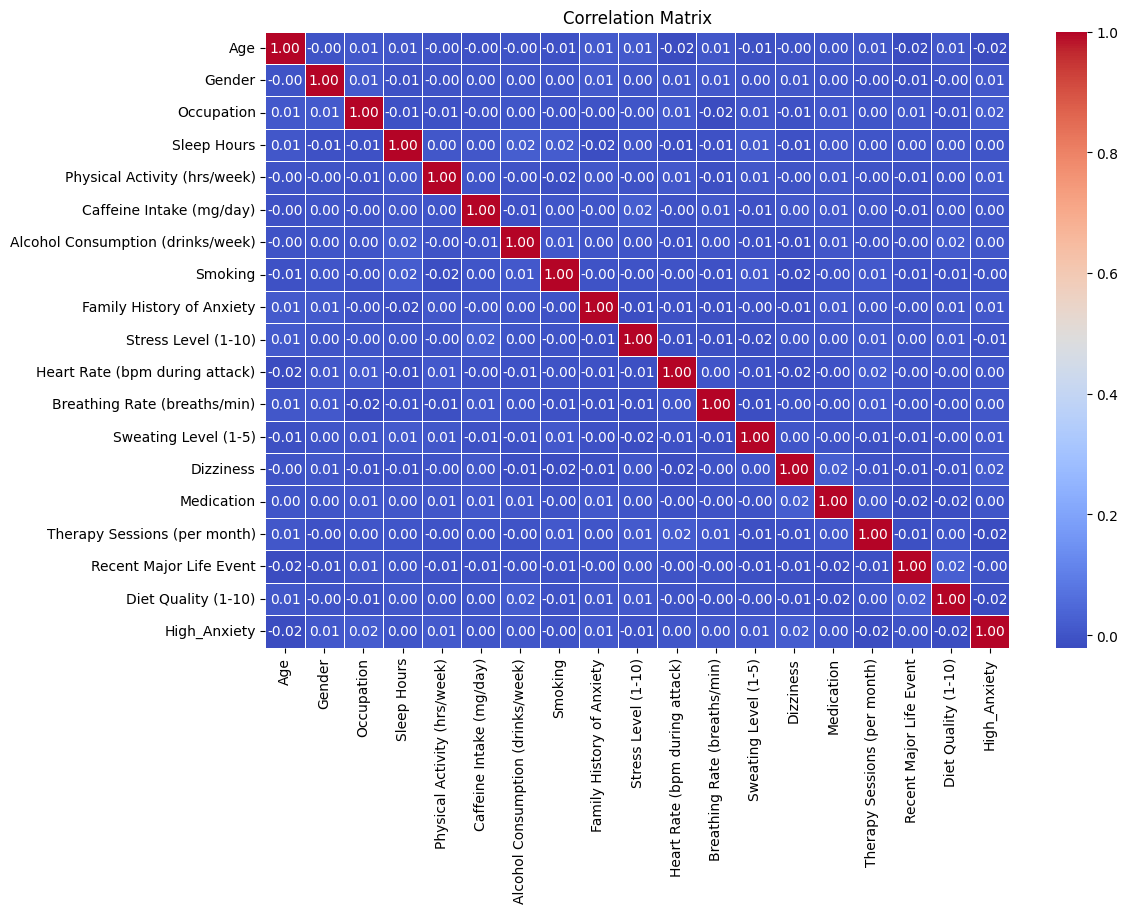

   Age  Gender  Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   56       0           2          9.6                           8.3   
1   46       1           4          6.4                           7.3   
2   32       0           0          6.9                           1.0   
3   60       1           0          9.2                           3.7   
4   25       1           3          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  \
0                       175                                  6        0   
1                        97                                  6        0   
2                       467                                 14        0   
3                       471                                 16        0   
4                       364                                  2        0   

   Family History of Anxiety  Stress Level (1-10)  \
0                          0                    4   
1   

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert categorical variables to numeric using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure all values are strings before encoding
    label_encoders[col] = le

# Compute summary statistics
summary_stats = df.describe()
display(summary_stats)

# Compute correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Display the first few rows to confirm changes
print(df.head())

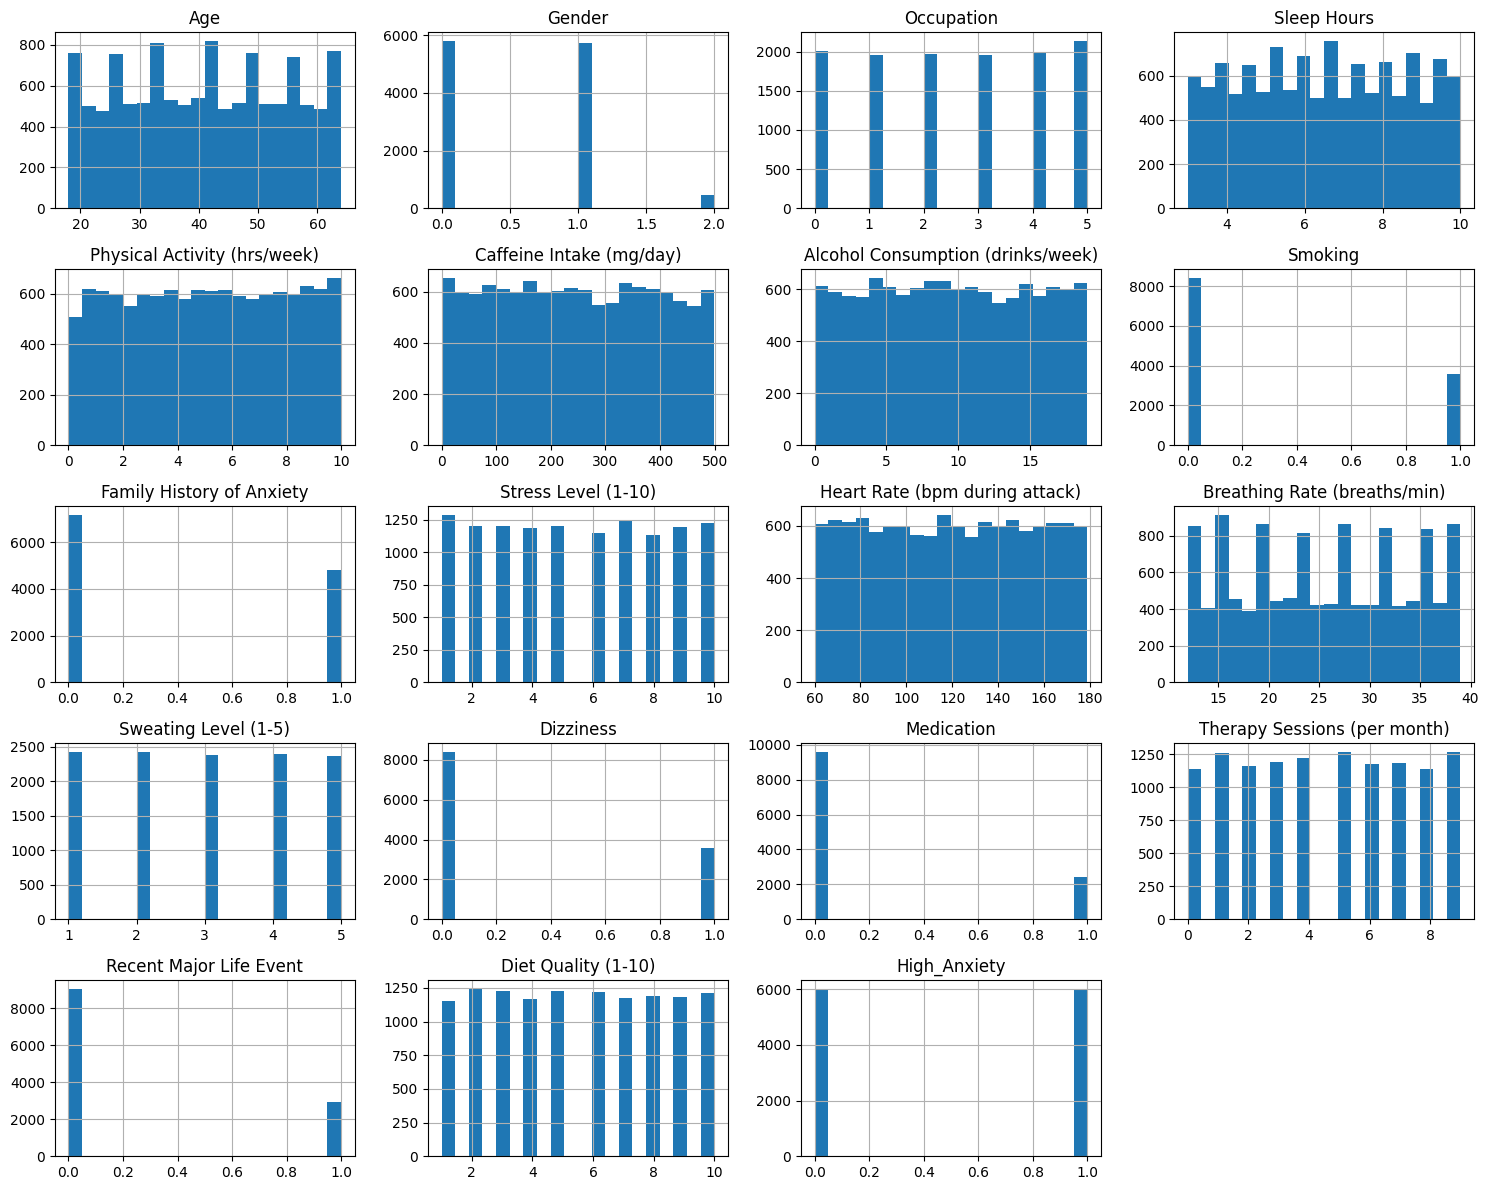

In [ ]:
df.hist(figsize=(15, 12), bins=20, layout=(5, 4))  # Adjust layout and bins
plt.tight_layout()  # Ensures proper spacing between plots
plt.show()


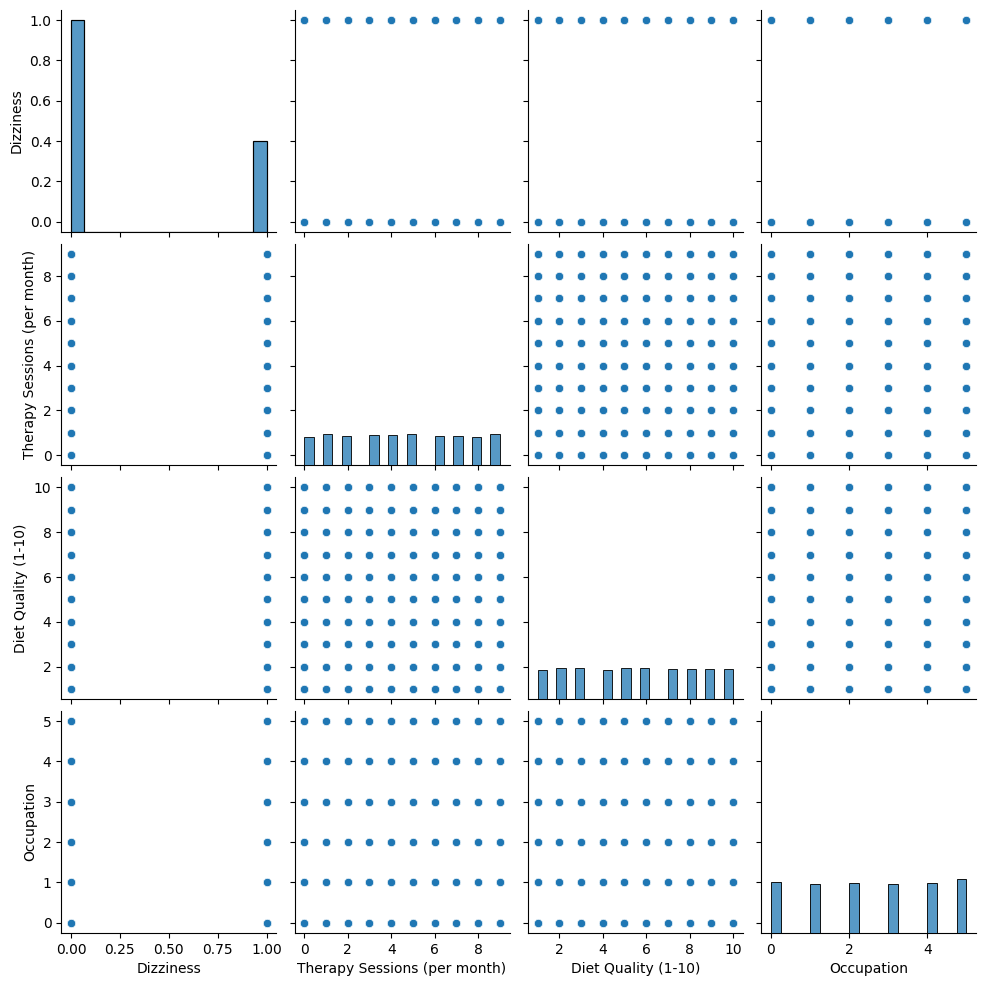

In [ ]:
sns.pairplot(df[["Dizziness", "Therapy Sessions (per month)", "Diet Quality (1-10)", "Occupation"]])
plt.show()

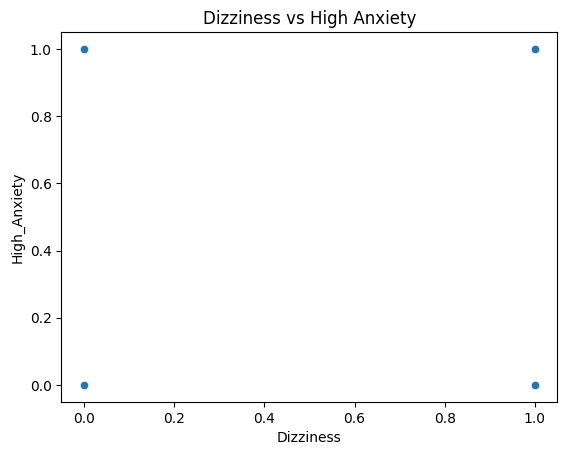

In [ ]:
sns.scatterplot(x="Dizziness", y="High_Anxiety", data=df)
plt.title("Dizziness vs High Anxiety")
plt.show()

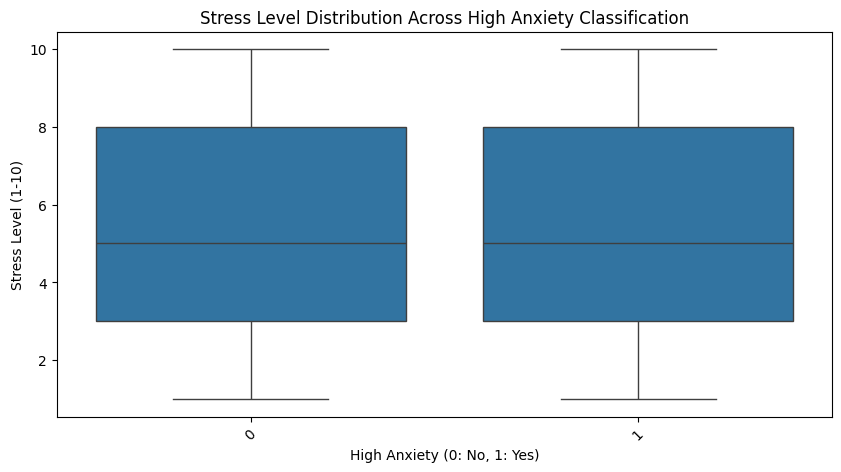

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="High_Anxiety", y="Stress Level (1-10)", data=df)
plt.xticks(rotation=45)
plt.title("Stress Level Distribution Across High Anxiety Classification")
plt.xlabel("High Anxiety (0: No, 1: Yes)")
plt.ylabel("Stress Level (1-10)")
plt.show()

In [ ]:
# Ensure all features are numeric
print("Column Data Types:")
print(df.dtypes)


Column Data Types:
Age                                    int64
Gender                                 int64
Occupation                             int64
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                                int64
Family History of Anxiety              int64
Stress Level (1-10)                    int64
Heart Rate (bpm during attack)         int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                              int64
Medication                             int64
Therapy Sessions (per month)           int64
Recent Major Life Event                int64
Diet Quality (1-10)                    int64
High_Anxiety                           int64
dtype: object


In [ ]:
# Feature and Target Selection
X = df.drop('High_Anxiety', axis=1)  # Assuming 'price_range' is the target variable
y = df['High_Anxiety']
print("Features (X):\n", X.head())  # Print first 5 rows of features
print("\nTarget (y):\n", y.head())  # Print first 5 rows of target

Features (X):
    Age  Gender  Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   56       0           2          9.6                           8.3   
1   46       1           4          6.4                           7.3   
2   32       0           0          6.9                           1.0   
3   60       1           0          9.2                           3.7   
4   25       1           3          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  \
0                       175                                  6        0   
1                        97                                  6        0   
2                       467                                 14        0   
3                       471                                 16        0   
4                       364                                  2        0   

   Family History of Anxiety  Stress Level (1-10)  \
0                          0              

In [ ]:
# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)

le = LabelEncoder()
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


Age                                    int64
Gender                                 int64
Occupation                             int64
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                                int64
Family History of Anxiety              int64
Stress Level (1-10)                    int64
Heart Rate (bpm during attack)         int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                              int64
Medication                             int64
Therapy Sessions (per month)           int64
Recent Major Life Event                int64
Diet Quality (1-10)                    int64
dtype: object


In [ ]:
# Standardizing the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardized Training Data (X_train_scaled):\n", X_train_scaled)
print("\nStandardized Testing Data (X_test_scaled):\n", X_test_scaled)

Standardized Training Data (X_train_scaled):
 [[ 1.19859046  0.76908289  1.43845067 ... -0.53155835  1.74172714
  -1.22604778]
 [-1.03527041 -0.97966077 -1.46140788 ... -0.88083694 -0.57414274
  -0.1757436 ]
 [ 1.42197655 -0.97966077  0.85847896 ... -0.18227976 -0.57414274
  -1.57614917]
 ...
 [-1.63096664 -0.97966077  1.43845067 ...  1.56411318 -0.57414274
  -0.87594639]
 [ 1.71982466 -0.97966077  0.27850725 ...  0.16699883 -0.57414274
  -0.87594639]
 [-1.63096664 -0.97966077  0.85847896 ... -1.57939412 -0.57414274
   0.17435779]]

Standardized Testing Data (X_test_scaled):
 [[ 1.27305249 -0.97966077  0.85847896 ... -0.18227976 -0.57414274
   0.52445918]
 [-0.88634635  0.76908289 -0.88143617 ...  1.56411318 -0.57414274
  -0.525845  ]
 [-0.51403621 -0.97966077 -0.88143617 ...  1.21483459 -0.57414274
  -1.22604778]
 ...
 [ 0.23058408 -0.97966077  1.43845067 ...  0.16699883  1.74172714
  -1.57614917]
 [-0.96080838  0.76908289 -0.30146446 ...  0.51627741  1.74172714
   1.57476335]
 [ 0.30

logistic model from scratch

In [ ]:
# Logistic Regression Model from Scratch
class LogisticRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Gradient Descent Updates
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred_prob = self.sigmoid(linear_model)
        return np.where(y_pred_prob >= 0.5, 1, 0)


In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)

# Now use y_encoded instead of y for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

hyperparameter optimization

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'class_weight': ['balanced', None]   # Handling class imbalance
}

# Perform GridSearchCV
log_reg_cv = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1', n_jobs=-1)
log_reg_cv.fit(X_train_scaled, y_train)

# Best model after GridSearch
best_log_reg = log_reg_cv.best_estimator_

# Print best hyperparameters
print("Best Hyperparameters:", log_reg_cv.best_params_)

Best Hyperparameters: {'C': 0.01, 'class_weight': None}


In [ ]:
# Check class distribution
print("Class distribution in y_train:", np.bincount(y_train))
print("Class distribution in y_test:", np.bincount(y_test))


#function to print the evaluation metricsss
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\nMetrics for {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")


Class distribution in y_train: [4798 4802]
Class distribution in y_test: [1189 1211]


In [ ]:
# Building Models for Classification
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred = log_reg.predict(X_train_scaled)

# Evaluate Scikit-Learn Logistic Regression
print("Scikit-Learn Logistic Regression:")
print_metrics(y_train, log_reg.predict(X_train_scaled), "Train Data")
print_metrics(y_test, log_reg.predict(X_test_scaled), "Test Data")

# Create an instance of the custom logistic regression class
log_reg_scratch = LogisticRegressionScratch()

# Fit the model to your training data
log_reg_scratch.fit(X_train_scaled, y_train)

print("\nLogistic Regression from Scratch:")
print_metrics(y_train, log_reg_scratch.predict(X_train_scaled), "Train Data")
print_metrics(y_test, log_reg_scratch.predict(X_test_scaled), "Test Data")

Scikit-Learn Logistic Regression:

Metrics for Train Data:
Accuracy: 0.5225
Recall: 0.5154
F1-score: 0.5192

Metrics for Test Data:
Accuracy: 0.5050
Recall: 0.5045
F1-score: 0.5071

Logistic Regression from Scratch:

Metrics for Train Data:
Accuracy: 0.5239
Recall: 0.5200
F1-score: 0.5221

Metrics for Test Data:
Accuracy: 0.5038
Recall: 0.5078
F1-score: 0.5081


In [ ]:
# Feature Selection using Feature Importance
importance = abs(log_reg.coef_).mean(axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance Ranking:")
print(feature_importance)


Feature Importance Ranking:
                              Feature  Importance
13                          Dizziness    0.051176
15       Therapy Sessions (per month)    0.049758
17                Diet Quality (1-10)    0.038254
2                          Occupation    0.035143
4        Physical Activity (hrs/week)    0.031091
8           Family History of Anxiety    0.030202
0                                 Age    0.030027
1                              Gender    0.017110
12               Sweating Level (1-5)    0.016977
16            Recent Major Life Event    0.013912
5            Caffeine Intake (mg/day)    0.012346
10     Heart Rate (bpm during attack)    0.011334
7                             Smoking    0.010855
9                 Stress Level (1-10)    0.010688
11       Breathing Rate (breaths/min)    0.006115
14                         Medication    0.005340
3                         Sleep Hours    0.003368
6   Alcohol Consumption (drinks/week)    0.001022


In [ ]:
# Final Model with Best Features
best_features = feature_importance['Feature'][:10].values  # Selecting top 10 features
X_train_best = X_train_scaled[:, :10]
X_test_best = X_test_scaled[:, :10]
print("the best features are :",best_features)

# Use log_reg_cv
final_model = LogisticRegression(C=log_reg_cv.best_params_['C'])
final_model.fit(X_train_best, y_train)
# Function to print evaluation metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\nMetrics for {dataset_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")

# Evaluate the final model on train and test data
print("\nFinal Model Performance:")

print_metrics(y_train, final_model.predict(X_train_best), "Train Data")
print_metrics(y_test, final_model.predict(X_test_best), "Test Data")

the best features are : ['Dizziness' 'Therapy Sessions (per month)' 'Diet Quality (1-10)'
 'Occupation' 'Physical Activity (hrs/week)' 'Family History of Anxiety'
 'Age' 'Gender' 'Sweating Level (1-5)' 'Recent Major Life Event']

Final Model Performance:

Metrics for Train Data:
Accuracy: 0.5124
Precision: 0.5125
Recall: 0.5150
F1-score: 0.5138

Metrics for Test Data:
Accuracy: 0.5100
Precision: 0.5143
Recall: 0.5186
F1-score: 0.5164
